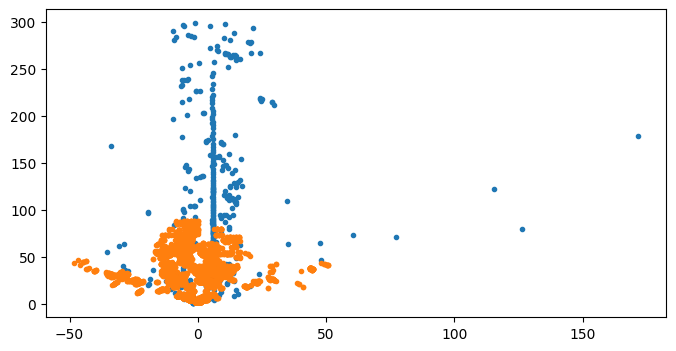

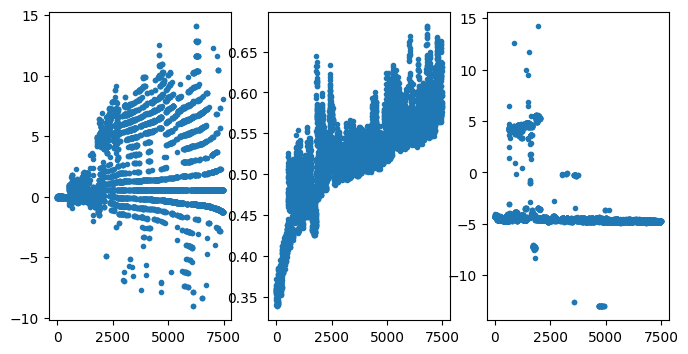

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 

path = "/media/charles/Charles/charles/DataSet/Dual_Radar/training/ars548/001100.bin"
data_ = np.fromfile(path, dtype=np.float32).reshape([-1, 5])

path2= "/media/charles/Charles/charles/DataSet/Dual_Radar/training/arbe/001100.bin"
data_2 = np.fromfile(path2, dtype=np.float32).reshape([-1, 5])

# print(data_[0:10,:])

plt.figure(figsize=(8,4))

plt.plot(data_[:, 1], data_[:, 0], '.')
plt.plot(data_2[:, 0], data_2[:, 1], '.')

plt.figure(figsize=(8,4))
plt.subplot(131)
plt.plot(data_2[:, 2],'.')

plt.subplot(132)
plt.plot(data_2[:, 3],'.')
plt.subplot(133)
plt.plot(data_2[:, 4],'.')



[-0.01437788 -4.658452  ]
[625 626 627 628 629 630 631 632 633 634]


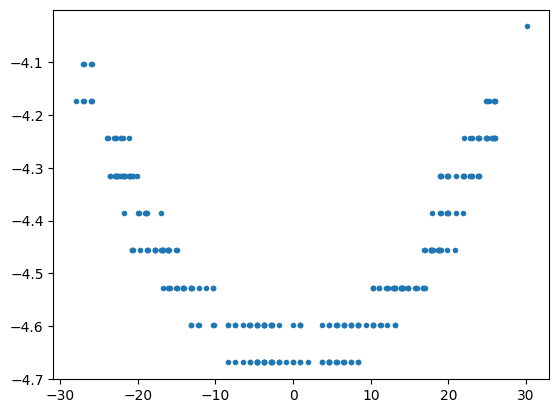

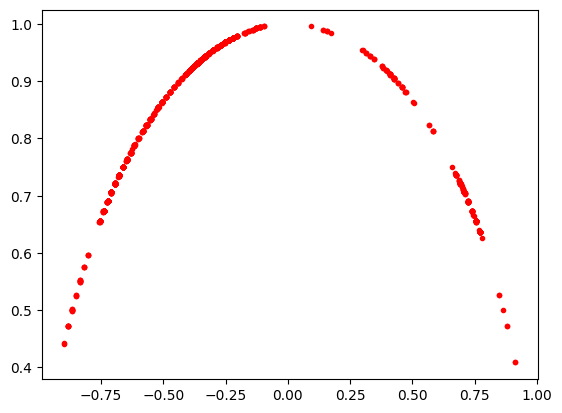

In [34]:
theta_ = np.arctan2(data_2[:, 0], data_2[:, 1]) / np.pi * 180.0

smp_num = 300

plt.figure()
plt.plot(theta_[0:smp_num], data_2[0:smp_num, 4], '.')

vd = data_2[0:smp_num, 4]

xyz_ = data_2[0:smp_num, 0:2] 
for i in range(smp_num):
    xyz_[i,:] =  xyz_[i,:] / (np.sqrt(xyz_[i, 0]**2 + xyz_[i, 1]**2))

vr = np.linalg.inv(xyz_.T.dot(xyz_)).dot(xyz_.T).dot(vd)
print(vr)


xyz_2 = data_2[:, 0:2] 
for i in range(xyz_2.shape[0]):
    xyz_2[i,:] =  xyz_2[i,:] / (np.sqrt(xyz_2[i, 0]**2 + xyz_2[i, 1]**2))

vd2 = xyz_2.dot(vr)

vd_error = np.abs(data_2[:, 4] - vd2)
plt.figure()
# plt.plot(vd_error)

dyn_ = np.array(np.where(vd_error > 0.5))
static_ = np.array(np.where(vd_error < 0.5))
# print(dyn_[0, 0:10])

plt.plot(data_2[:, 0], data_2[:,1], 'b.')
plt.plot(data_2[dyn_[0, :], 0], data_2[dyn_[0, :], 1], 'r.')
plt.plot(data_2[static_[0, :], 0], data_2[static_[0, :], 1], 'g.')
